# Deep Learning Assignment - 1

# Part 1 - TensorFlow

Step 1 - Load the dataset into a dataframe for Further Process

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [76]:
# Load the CSV file
file_path = '/Users/shamalachandrappa/Desktop/Git Hub Push Everyday/DL/Assignment 1/diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


Step 2 - Data Preprocessing and Data Visualizations

In [77]:
print("Missing values for each column:")
print(data.isnull().sum())

print("Statistical description of the diabetes dataset:")
print(data.describe())

Missing values for each column:
-0.294118     0
0.487437      0
0.180328      0
-0.292929     0
0             0
0.00149028    0
-0.53117      0
-0.0333333    0
0.1           0
dtype: int64
Statistical description of the diabetes dataset:
        -0.294118    0.487437    0.180328   -0.292929           0  0.00149028  \
count  758.000000  758.000000  758.000000  758.000000  758.000000  758.000000   
mean    -0.407807    0.218208    0.176500   -0.289731   -0.323961   -0.032289   
std      0.386493    0.306465    0.201420    0.258651    0.375608    0.205508   
min     -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   -0.457526   
25%     -0.764706   -0.005025    0.016393   -0.494949   -0.716312   -0.179583   
50%     -0.529412    0.165829    0.180328   -0.292929    0.000000   -0.034277   
75%      0.000000    0.407035    0.311475    0.000000    0.000000    0.087929   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         -0.53117  -0.0333333   

Observation : No missing values in any of the columns.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

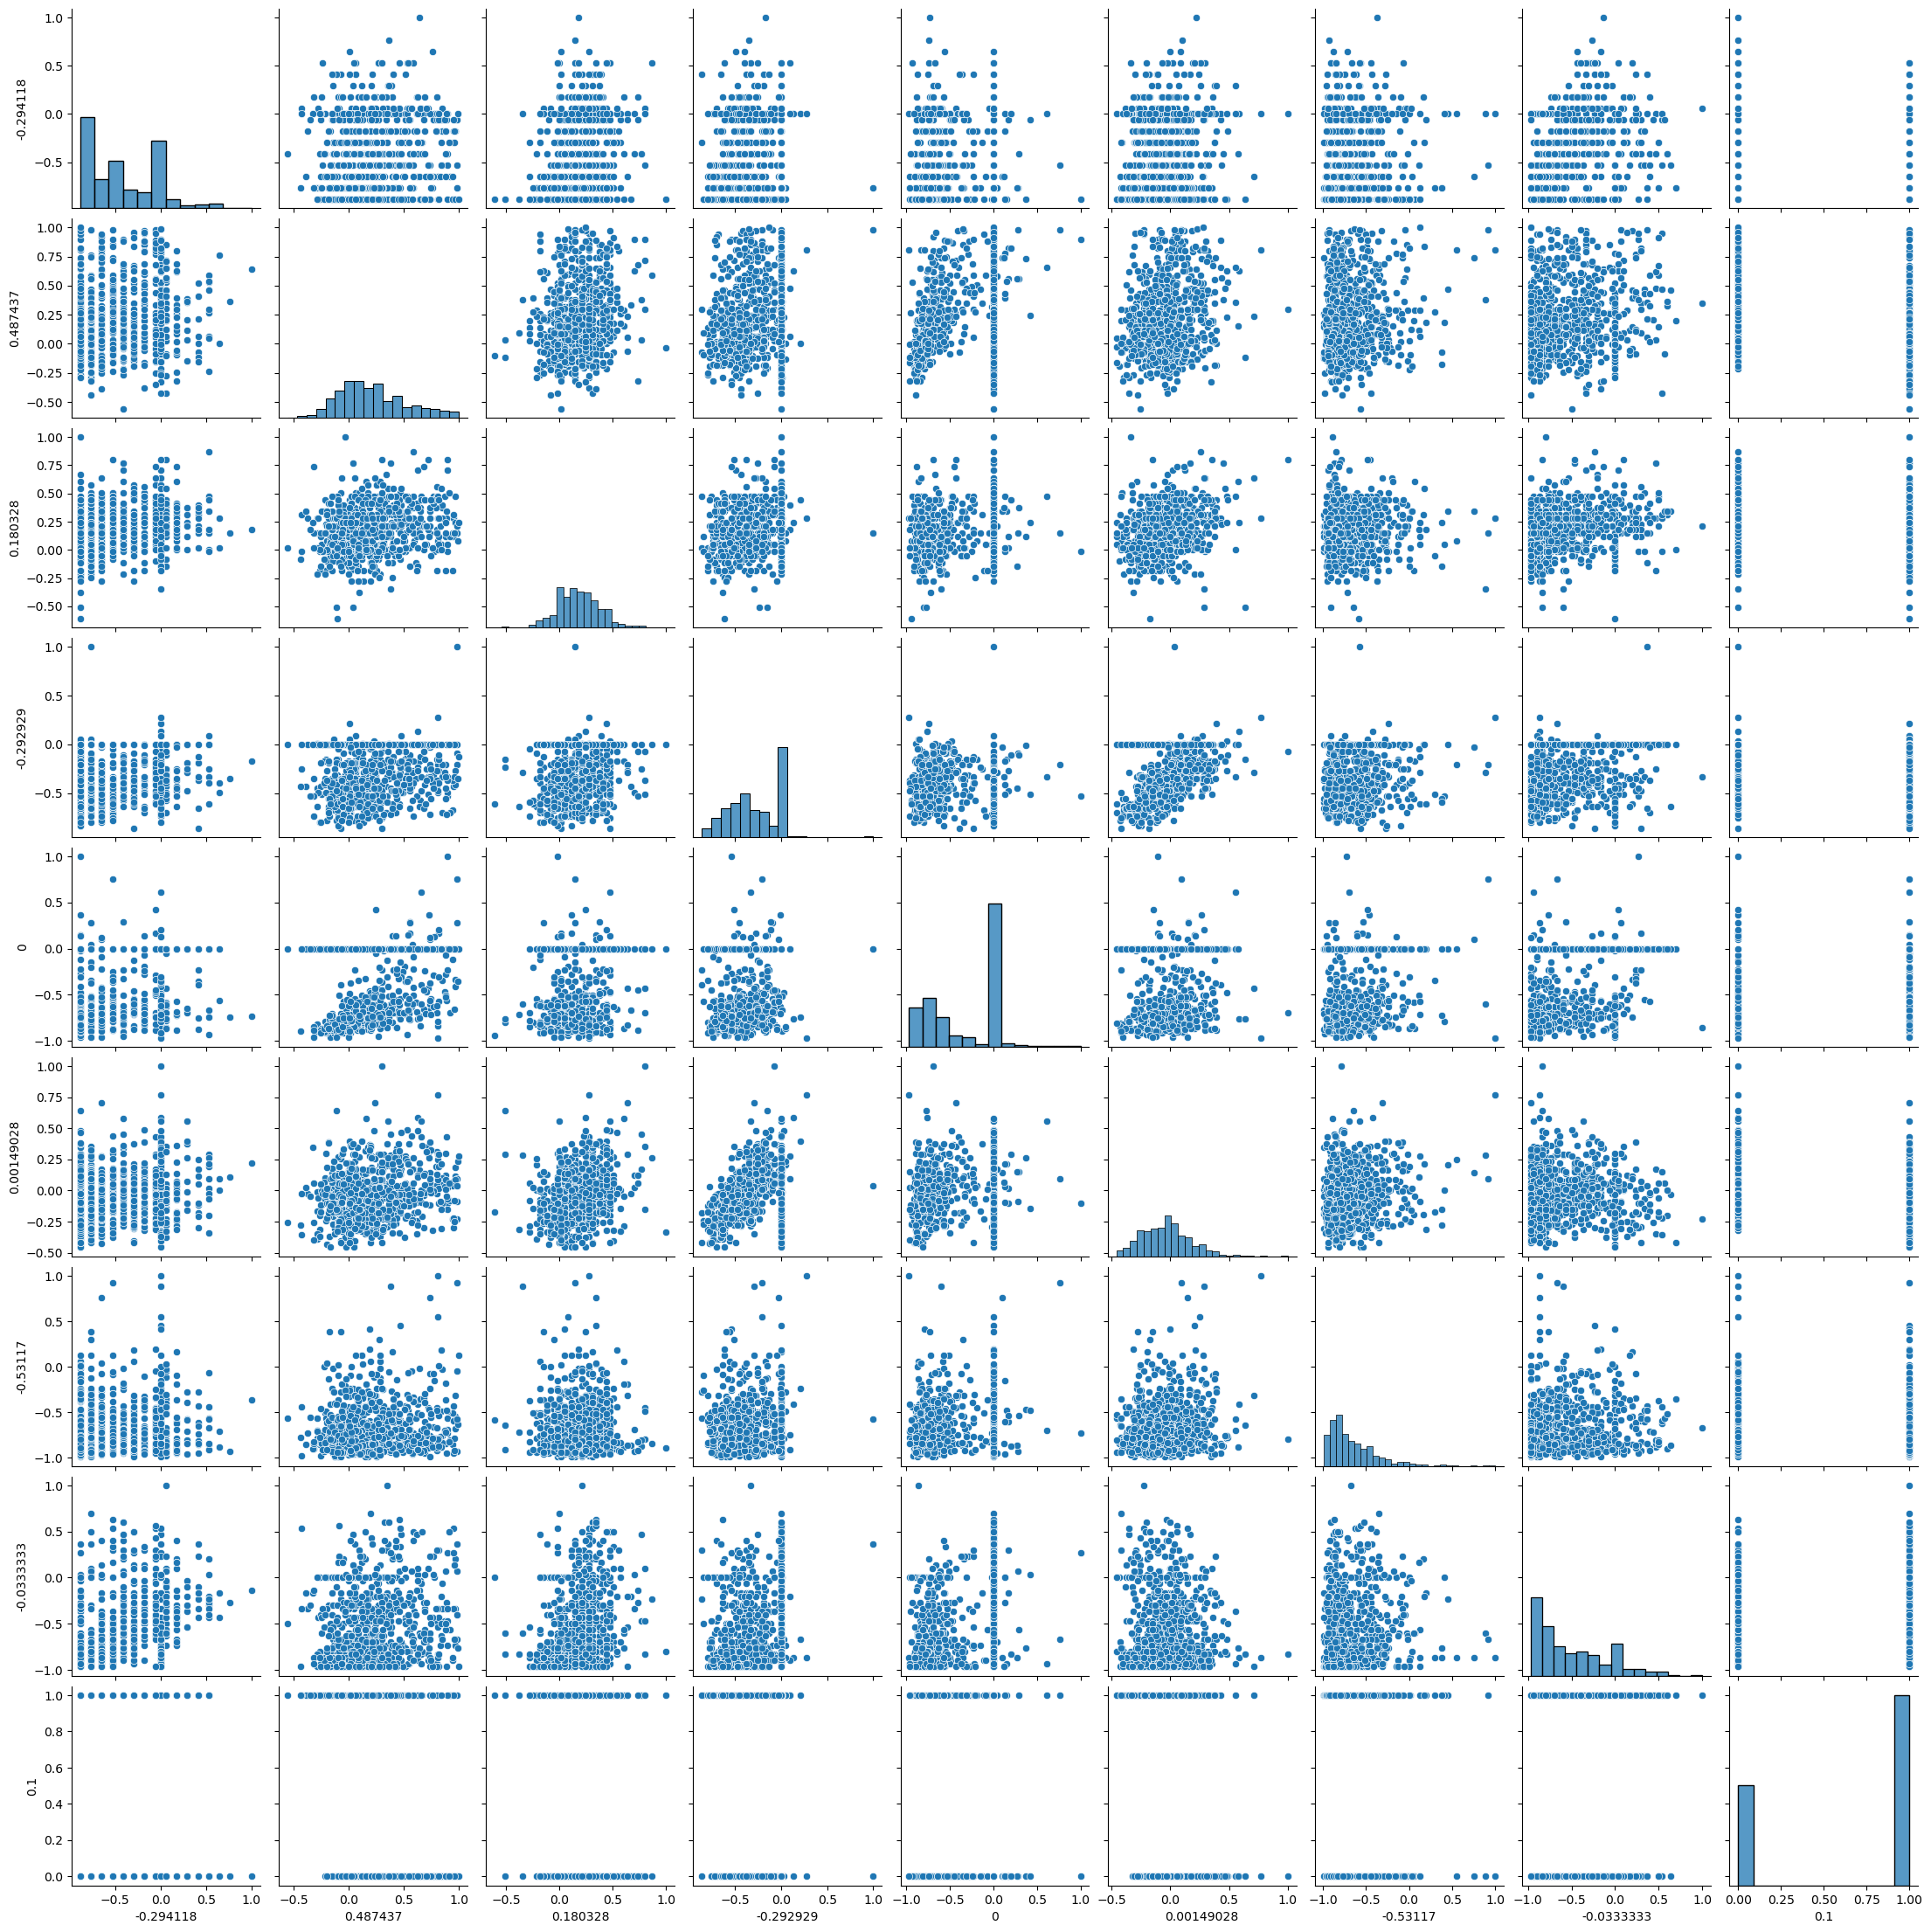

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between features
sns.pairplot(data)
plt.show()

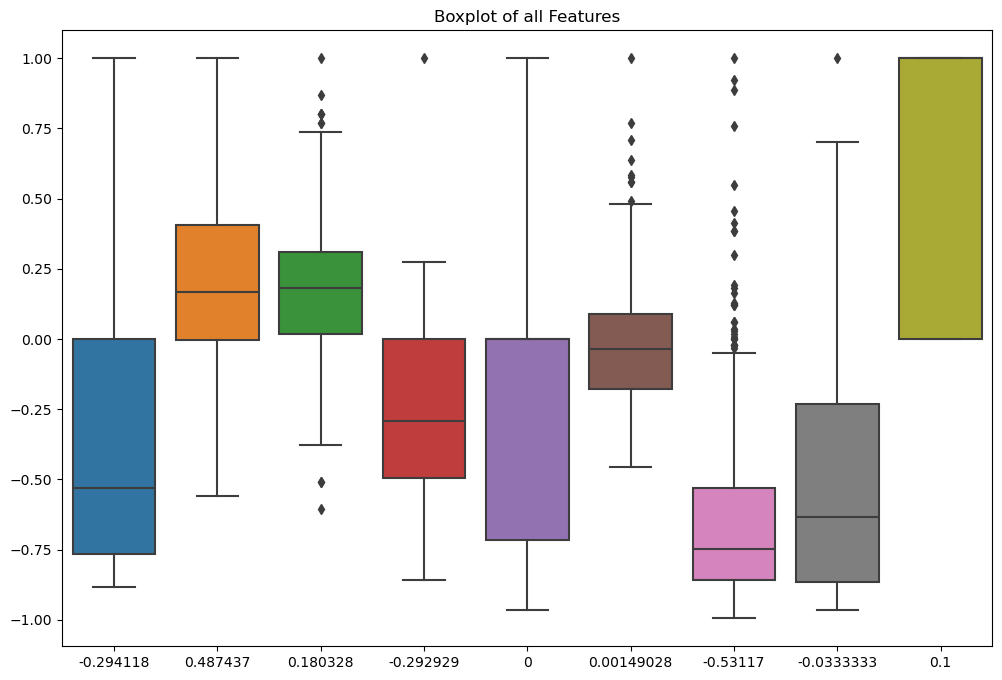

In [110]:
# Boxplots for feature distributions
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title("Boxplot of all Features")
plt.show()


Class Distribution

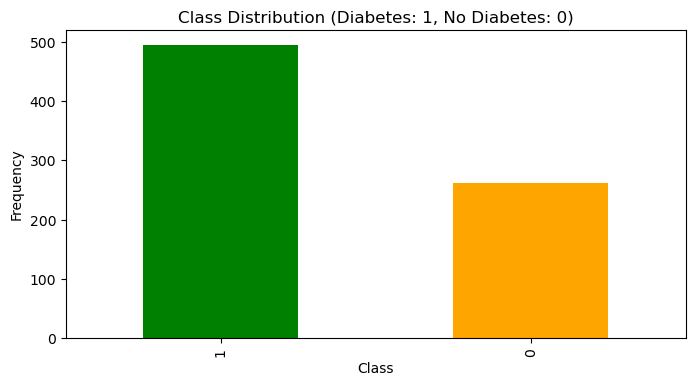

In [78]:
plt.figure(figsize=(8, 4))
data.iloc[:, -1].value_counts().plot(kind='bar', color=['Green', 'orange'])
plt.title("Class Distribution (Diabetes: 1, No Diabetes: 0)")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


Class Distribution of both classes Diabetes :1  and No Diabetes: 0 are illustrated in the above graph.

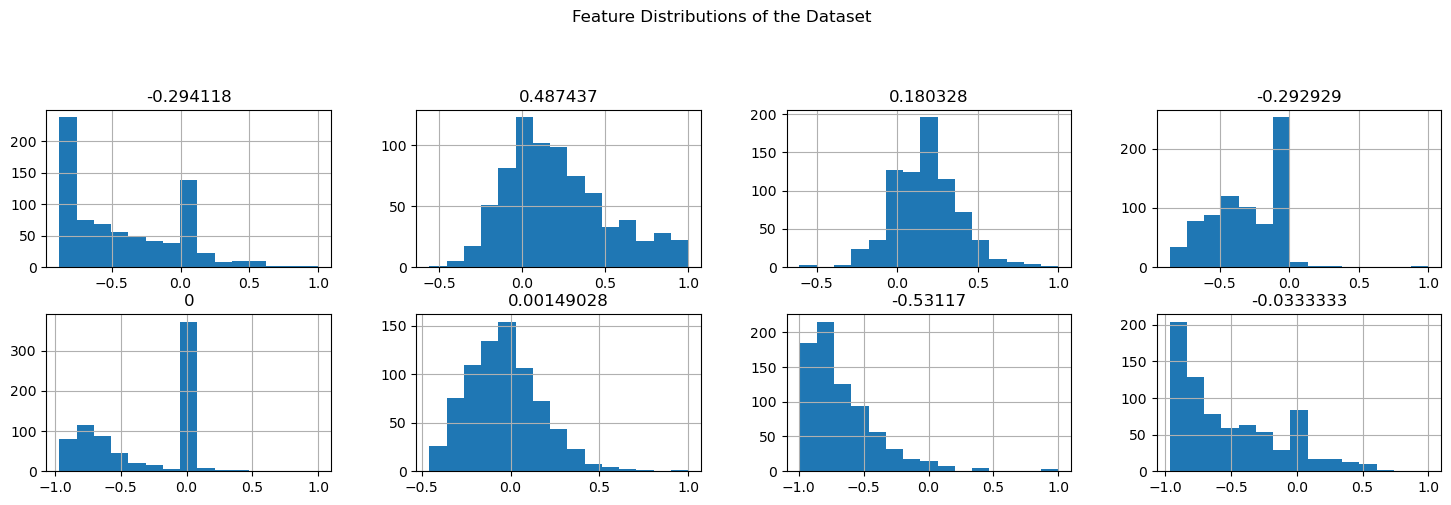

In [79]:
data.iloc[:, :-1].hist(bins=15, figsize=(18, 10), layout=(4, 4))
plt.suptitle("Feature Distributions of the Dataset")
plt.show()

Statistics descriptions of each column is shown along feature distributions of the same. 

In [81]:
z_scores = np.abs(stats.zscore(data.iloc[:, :-1]))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers : {np.sum(outliers)}")

Number of outliers : 27


Step 3 - Splitting of dataset

In [82]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Class distribution of y_train:", np.bincount(y_train))
print("Class distribution of y_test:", np.bincount(y_test))

Class distribution of y_train: [183 347]
Class distribution of y_test: [ 79 149]


The entire dataset is split as train and test in the ratio of 70:30 respectively. 

Step 4 - Simple Model

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(16, input_dim=8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

The model is made up of of 3 layers: 

1. 2 hidden layers (with 16 and 8 neurons, respectively), one output layer for binary classification. 
The first layer has 144 parameters, the second has 136, and the output layer has 9 parameters, resulting in a total of 289 trainable parameters. 
2. All layers use the ReLU activation function, except the output layer, which uses sigmoid for binary classification.

Step 5 - Model Training

In [84]:
history = model.fit(X_train, y_train, epochs=55, batch_size=16, validation_data=(X_test, y_test), verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/55
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6594 - loss: 0.6556 - val_accuracy: 0.6535 - val_loss: 0.6390
Epoch 2/55
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.6584 - loss: 0.6292 - val_accuracy: 0.6535 - val_loss: 0.6242
Epoch 3/55
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.6659 - loss: 0.6036 - val_accuracy: 0.6535 - val_loss: 0.6117
Epoch 4/55
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.6315 - loss: 0.6084 - val_accuracy: 0.6535 - val_loss: 0.6001
Epoch 5/55
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.6549 - loss: 0.5754 - val_accuracy: 0.6754 - val_loss: 0.5842
Epoch 6/55
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.7004 - loss: 0.5647 - val_accuracy: 0.7018 - val_loss: 0.5682
Epoch 7/55
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.7332 - loss: 0.5569 - val_accuracy: 0.7105 - val_loss: 0.5547
Epoch 8/55
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.7669 - loss: 0.5162 - val_accuracy: 0.72

The model trained for 50 epochs, achieving a final training accuracy of 87.42% and a validation accuracy of 73.68%. The loss and accuracy stabilized after around 40 epochs, indicating that the model converged without significant overfitting. The test accuracy of 72.68% reflects reasonable generalization to unseen data.

Step 6 - Predictions and Comparison of Test Labels

In [85]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

print("Predictions:\n", predictions)
print("True labels:\n", y_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predictions:
 [[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0

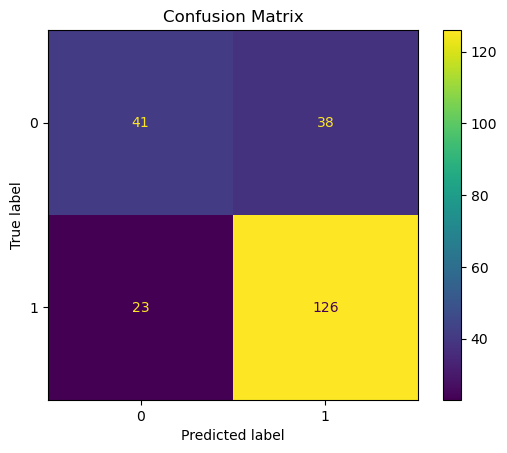

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix')
plt.show()


The confusion matrix explains that the model correctly predicted 126 true positives and 40 true negatives. Among which there are 39 false positives (incorrectly predicting the negative class as positive) and 23 false negatives (incorrectly predicting the positive class as negative). 
This indicates that while the model performs well overall, it tends to make more mistakes when predicting negative cases (class 0).

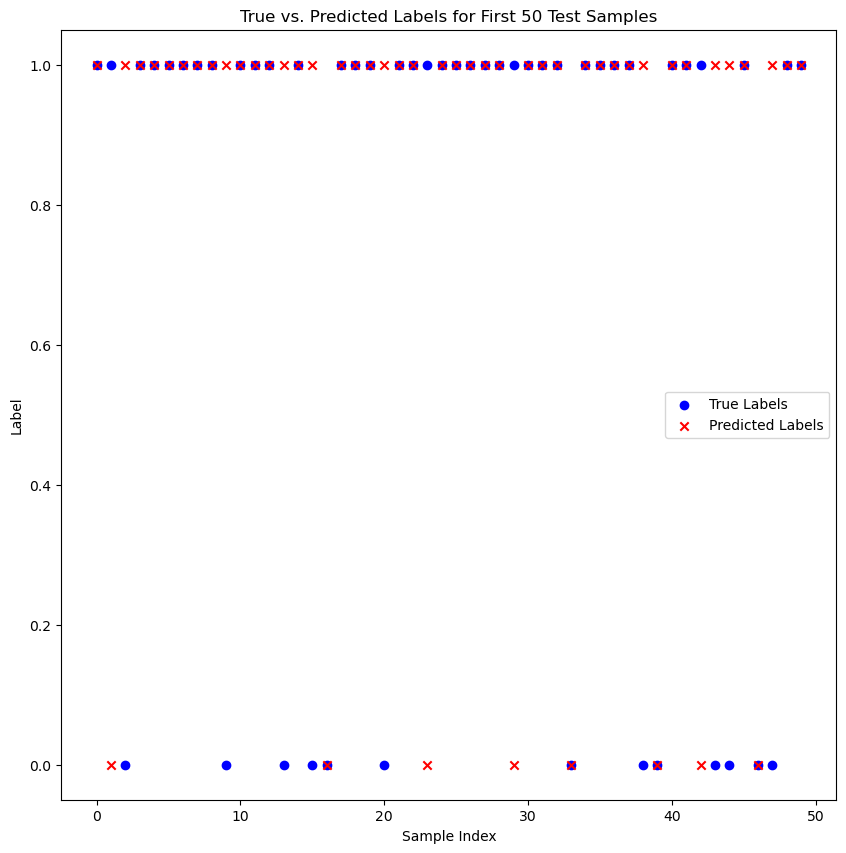

In [88]:
# Scatter plot for first 50 test samples
plt.figure(figsize=(10, 10))
plt.scatter(range(50), y_test[:50], color='blue', label='True Labels')
plt.scatter(range(50), predictions[:50], color='red', marker='x', label='Predicted Labels')
plt.title('True vs. Predicted Labels for First 50 Test Samples')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.show()


The scatter plot compares the true and predicted labels for the first 50 test samples. While many of the predictions align with the true labels, as seen by the overlap of red crosses (predictions) and blue dots (true labels), there are noticeable mismatches, particularly for class 0 (negative). This visualization suggests that the model tends to perform better for class 1 but struggles with some misclassifications.

Step 7 : Accuracy Calculation 

In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 72.81%


Step 8, 9 and 10 - Hypothesizing changes that can be made, testing these hypothesis by training models and showing results

Some of the changes that can be made are: 

Increase the number of layers (depth) or neurons (width), Change activation functions (e.g., Leaky ReLU or Tanh), Experiment with different optimizers and learning rates, Add batch normalization layers, Increase the number of epochs or apply early stopping, Use SGD optimizer with a different learning rate, Try different loss functions.


In [100]:
# Hypothesis: Increase model depth by adding more layers
model = Sequential()

model.add(Dense(32, input_dim=8, activation='relu'))

model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8226 - loss: 0.3954 - val_accuracy: 0.7149 - val_loss: 0.4886
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8124 - loss: 0.3920 - val_accuracy: 0.7149 - val_loss: 0.4887
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.8322 - loss: 0.3943 - val_accuracy: 0.7368 - val_loss: 0.4961
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8277 - loss: 0.3998 - val_accuracy: 0.7281 - val_loss: 0.4891
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8179 - loss: 0.3741 - val_accuracy: 0.7325 - val_loss: 0.4906
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.8435 - loss: 0.3658 - val_accuracy: 0.7325 - val_loss: 0.4923
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8346 - loss: 0.3662 - val_accuracy: 0.7368 - val_loss: 0.4949
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.8267 - loss: 0.3990 - val_accuracy: 0.74

In [98]:
# Hypothesis: Increase the number of neurons in each layer
model = Sequential()

model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8429 - loss: 0.3304 - val_accuracy: 0.7456 - val_loss: 0.6104
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8542 - loss: 0.3343 - val_accuracy: 0.7412 - val_loss: 0.6128
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8205 - loss: 0.3736 - val_accuracy: 0.7368 - val_loss: 0.6220
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.8557 - loss: 0.3084 - val_accuracy: 0.7456 - val_loss: 0.6065
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.8691 - loss: 0.3093 - val_accuracy: 0.7412 - val_loss: 0.6163
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8582 - loss: 0.3132 - val_accuracy: 0.7588 - val_loss: 0.6122
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.8312 - loss: 0.3472 - val_accuracy: 0.7632 - val_loss: 0.6121
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.8591 - loss: 0.3298 - val_accuracy: 0.73

In [37]:
from tensorflow.keras.layers import LeakyReLU

# Hypothesis: Use Leaky ReLU as activation instead of ReLU
model = Sequential()

model.add(Dense(32, input_dim=8))
model.add(LeakyReLU(alpha=0.1))  
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.1)) 

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6693 - loss: 0.6477 - val_accuracy: 0.6491 - val_loss: 0.6085
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.6447 - loss: 0.6011 - val_accuracy: 0.6711 - val_loss: 0.5789
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.6965 - loss: 0.5464 - val_accuracy: 0.7105 - val_loss: 0.5518
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.7662 - loss: 0.5171 - val_accuracy: 0.7149 - val_loss: 0.5285
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.7945 - loss: 0.4646 - val_accuracy: 0.7412 - val_loss: 0.5155
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.7628 - loss: 0.4747 - val_accuracy: 0.7412 - val_loss: 0.5079
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8040 - loss: 0.4379 - val_accuracy: 0.7412 - val_loss: 0.5037
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.7832 - loss: 0.4549 - val_accuracy: 0.73

In [39]:
from tensorflow.keras.layers import Dropout

# Hypothesis: Add dropout layers to prevent overfitting
model = Sequential()

model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dropout(0.3))  
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))  

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5886 - loss: 0.6653 - val_accuracy: 0.6535 - val_loss: 0.6352
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.6601 - loss: 0.6138 - val_accuracy: 0.6535 - val_loss: 0.6092
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.6824 - loss: 0.5948 - val_accuracy: 0.6579 - val_loss: 0.5934
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.6704 - loss: 0.5888 - val_accuracy: 0.6754 - val_loss: 0.5751
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.7376 - loss: 0.5491 - val_accuracy: 0.7105 - val_loss: 0.5542
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.6905 - loss: 0.5493 - val_accuracy: 0.7149 - val_loss: 0.5380
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.7603 - loss: 0.5203 - val_accuracy: 0.7325 - val_loss: 0.5278
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.7402 - loss: 0.5190 - val_accuracy: 0.73

In [41]:
from tensorflow.keras.layers import BatchNormalization

# Hypothesis: Add batch normalization layers
model = Sequential()

model.add(Dense(32, input_dim=8, activation='relu'))
model.add(BatchNormalization())  
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization()) 

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 96 (384.00 B)

In [42]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5136 - loss: 0.8510 - val_accuracy: 0.6579 - val_loss: 0.6501
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.6228 - loss: 0.6588 - val_accuracy: 0.6579 - val_loss: 0.6275
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.7249 - loss: 0.5371 - val_accuracy: 0.6535 - val_loss: 0.6097
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7381 - loss: 0.5055 - val_accuracy: 0.6623 - val_loss: 0.5943
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.7795 - loss: 0.4720 - val_accuracy: 0.6754 - val_loss: 0.5812
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.7961 - loss: 0.4642 - val_accuracy: 0.6798 - val_loss: 0.5720
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.7819 - loss: 0.4562 - val_accuracy: 0.7018 - val_loss: 0.5576
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.7953 - loss: 0.4337 - val_accuracy: 0.7149

In [43]:
# Hypothesis: Increase the number of epochs to 100
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(16, input_dim=8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Hypothesis: Increase the number of epochs to 100
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5216 - loss: 0.6934 - val_accuracy: 0.6316 - val_loss: 0.6522
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.6278 - loss: 0.6548 - val_accuracy: 0.6579 - val_loss: 0.6208
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.6664 - loss: 0.6092 - val_accuracy: 0.6579 - val_loss: 0.5991
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.6288 - loss: 0.6141 - val_accuracy: 0.6623 - val_loss: 0.5826
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.6436 - loss: 0.5845 - val_accuracy: 0.6623 - val_loss: 0.5686
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.6655 - loss: 0.5589 - val_accuracy: 0.7237 - val_loss: 0.5558
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.7244 - loss: 0.5364 - val_accuracy: 0.7325 - val_loss: 0.5453
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.7576 - loss: 0.5309 - val_accura

In [45]:
# Hypothesis: Use SGD optimizer with a different learning rate
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Dense(16, input_dim=8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6507 - loss: 0.6344 - val_accuracy: 0.6623 - val_loss: 0.6261
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.6539 - loss: 0.6189 - val_accuracy: 0.6623 - val_loss: 0.6201
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.6636 - loss: 0.6007 - val_accuracy: 0.6623 - val_loss: 0.6151
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.6551 - loss: 0.6131 - val_accuracy: 0.6623 - val_loss: 0.6102
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.6271 - loss: 0.6171 - val_accuracy: 0.6623 - val_loss: 0.6060
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6632 - loss: 0.5856 - val_accuracy: 0.6579 - val_loss: 0.6016
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.6703 - loss: 0.5792 - val_accuracy: 0.6579 - val_loss: 0.5980
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.6615 - loss: 0.5818 - val_accuracy: 0.6579

In [96]:
# Hypothesis: Use hinge loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(16, input_dim=8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='hinge', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3497 - loss: 0.8714 - val_accuracy: 0.3860 - val_loss: 0.8482
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.4865 - loss: 0.8667 - val_accuracy: 0.6579 - val_loss: 0.8410
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.6611 - loss: 0.8824 - val_accuracy: 0.6842 - val_loss: 0.8361
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.7249 - loss: 0.8186 - val_accuracy: 0.6930 - val_loss: 0.8302
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.7095 - loss: 0.8311 - val_accuracy: 0.6930 - val_loss: 0.8237
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.7421 - loss: 0.8297 - val_accuracy: 0.6930 - val_loss: 0.8172
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.7310 - loss: 0.8098 - val_accuracy: 0.7018 - val_loss: 0.8106
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.7184 - loss: 0.8019 - val_accura

In [94]:
# Hypothesis: Use Early Stopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(16, input_dim=8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping], verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4293 - loss: 0.7338 - val_accuracy: 0.5965 - val_loss: 0.6769
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.5876 - loss: 0.6747 - val_accuracy: 0.6491 - val_loss: 0.6339
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.6522 - loss: 0.6292 - val_accuracy: 0.6754 - val_loss: 0.6075
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.6825 - loss: 0.6072 - val_accuracy: 0.6886 - val_loss: 0.5864
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.6628 - loss: 0.5896 - val_accuracy: 0.6974 - val_loss: 0.5691
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.6692 - loss: 0.5782 - val_accuracy: 0.7325 - val_loss: 0.5530
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.7061 - loss: 0.5543 - val_accuracy: 0.7281 - val_loss: 0.5396
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.7361 - loss: 0.5236 - val_accura

During my experimentation with different neural network architectures and optimization techniques, I implemented a variety of approaches to enhance performance. Below are the models and strategies I explored, along with their results:

1. Base Model: Increasing Model Depth

I created a model with three hidden layers of 32, 16, and 8 neurons, using ReLU activation and training it for 50 epochs.
Result: The test accuracy reached 75.44%. While training accuracy improved steadily, both training and validation accuracy plateaued early, indicating possible underfitting.

2. Increasing the Number of Neurons

To improve performance, I increased the neurons to 64, 32, and 16 in each hidden layer.
Result: The test accuracy improved slightly to 78.07%, but the training and validation accuracy still plateaued, showing limited gains.

3. Using Leaky ReLU

I replaced ReLU with Leaky ReLU to address the "dying ReLU" problem while keeping the base model architecture unchanged.
Result: The test accuracy was 73.68%, similar to the base model, with minimal performance gain from Leaky ReLU.

4. Adding Dropout Layers

To prevent overfitting, I added dropout layers with a 30% dropout rate after each dense layer.
Result: The test accuracy decreased slightly to 71.93%, suggesting that too much regularization may have caused underfitting.

5. Batch Normalization

I added batch normalization after each dense layer to improve convergence by normalizing layer inputs.
Result: The model achieved a test accuracy of 75.44%, with no significant improvement compared to the previous models.

6. Increasing Epochs to 100

I trained the model for 100 epochs to see if more training time would yield better performance.
Result: The test accuracy remained at 72.81%, with no substantial improvement beyond 50 epochs, as validation accuracy plateaued early.

7. Changing the Optimizer to SGD

I switched from the Adam optimizer to SGD with a learning rate of 0.01 to test the impact of different optimizers.
Result: The test accuracy dropped to 67.98%, indicating that Adam’s adaptive learning rate was more effective for this task.

8. Using Hinge Loss

I replaced binary cross-entropy with hinge loss, which is often used for SVM-style classification.
Result: The test accuracy remained at 73.68%, showing that hinge loss was not beneficial for this binary classification task.

9. Using Early Stopping

I implemented early stopping to prevent overfitting by halting training when validation loss stopped improving.
Result: The test accuracy reached 72.37%, with training stopping early at around 30 epochs, showing results similar to the base model.

Best Model is Increase number of neurons in each layer with an accuracy of 78.07%

## Part 2 Pytorch

# Step 1 Loading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# Load the CSV file
file_path = '/Users/shamalachandrappa/Desktop/Git Hub Push Everyday/DL/Assignment 1/diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


# Step 2: Data Preprocessing and Data Visulaization

In [3]:
print("Missing values for each column:")
print(data.isnull().sum())

print("Statistical description of the diabetes dataset:")
print(data.describe())

Missing values for each column:
-0.294118     0
0.487437      0
0.180328      0
-0.292929     0
0             0
0.00149028    0
-0.53117      0
-0.0333333    0
0.1           0
dtype: int64
Statistical description of the diabetes dataset:
        -0.294118    0.487437    0.180328   -0.292929           0  0.00149028  \
count  758.000000  758.000000  758.000000  758.000000  758.000000  758.000000   
mean    -0.407807    0.218208    0.176500   -0.289731   -0.323961   -0.032289   
std      0.386493    0.306465    0.201420    0.258651    0.375608    0.205508   
min     -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   -0.457526   
25%     -0.764706   -0.005025    0.016393   -0.494949   -0.716312   -0.179583   
50%     -0.529412    0.165829    0.180328   -0.292929    0.000000   -0.034277   
75%      0.000000    0.407035    0.311475    0.000000    0.000000    0.087929   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         -0.53117  -0.0333333   

Observation : No missing values in any of the columns.

# Class Distribution

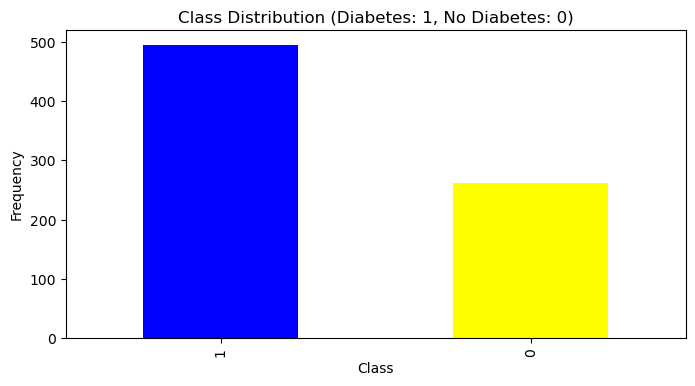

In [5]:
plt.figure(figsize=(8, 4))
data.iloc[:, -1].value_counts().plot(kind='bar', color=['Blue', 'Yellow'])
plt.title("Class Distribution (Diabetes: 1, No Diabetes: 0)")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


Class Distribution of both classes Diabetes :1  and No Diabetes: 0 are illustrated in the above graph.

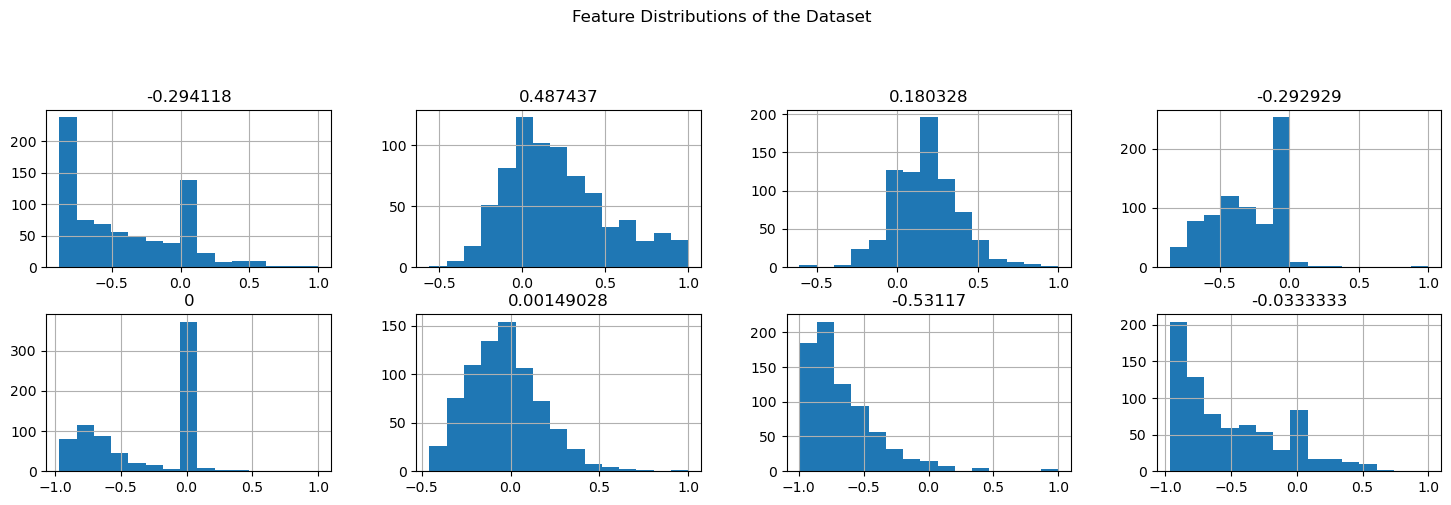

In [6]:
data.iloc[:, :-1].hist(bins=15, figsize=(18, 10), layout=(4, 4))
plt.suptitle("Feature Distributions of the Dataset")
plt.show()

Statistics descriptions of each column is shown along feature distributions of the same. 

In [8]:
z_scores = np.abs(stats.zscore(data.iloc[:, :-1]))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers : {np.sum(outliers)}")

Number of outliers : 27


# Step - 3 Spliting the Dataset

In [23]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (530, 8)
Testing data shape: (228, 8)


The dataset is split between train and test  in the ratio of 70:30 respectively. 

Convert to Pytorch Tensors

In [24]:

import torch

# Converting data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Ensure the target tensors are of the correct shape
y_train_tensor = y_train_tensor.unsqueeze(1) if y_train_tensor.ndim == 1 else y_train_tensor
y_test_tensor = y_test_tensor.unsqueeze(1) if y_test_tensor.ndim == 1 else y_test_tensor

# Print to verify
print("X_train_tensor:", X_train_tensor.shape)
print("y_train_tensor:", y_train_tensor.shape)


X_train_tensor: torch.Size([530, 8])
y_train_tensor: torch.Size([530, 1])


This code transforms the training and testing data, which are initially in pandas DataFrames, into PyTorch tensors of type float32. The unsqueeze(1) function is used to reshape the target labels (y_train and y_test) from 1D to 2D to ensure they are in the correct format for model training.

Step - 4 : Model Building

In [58]:
import torch.nn as nn

class BinaryClassificationModel(nn.Module):
    def __init__(self):
        super(BinaryClassificationModel, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 16)  # Input layer (based on number of features), 16 neurons
        self.fc2 = nn.Linear(16, 8)  # Hidden layer with 8 neurons
        self.fc3 = nn.Linear(8, 1)   # Output layer with 1 neuron for binary classification
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # First hidden layer with ReLU activation
        x = torch.relu(self.fc2(x))  # Second hidden layer with ReLU activation
        x = torch.sigmoid(self.fc3(x))  # Output layer with Sigmoid activation
        return x

model = BinaryClassificationModel()

print(model)

BinaryClassificationModel(
  (fc1): Linear(in_features=8, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)


The model comprises three layers: two hidden layers (with 16 and 8 neurons) and an output layer designed for binary classification. The first hidden layer has 144 parameters, the second has 136, and the output layer has 9, totaling 289 trainable parameters. The hidden layers use the ReLU activation function, while the output layer employs the sigmoid function for binary classification. This PyTorch model is equivalent to the TensorFlow model, utilizing the Adam optimizer and binary cross-entropy loss for binary classification tasks.

Step - 5 Model Training

In [59]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

epochs = 50
for epoch in range(epochs):
    running_loss = 0.0
    
    model.train()
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')


Epoch 1/50, Loss: 0.6609
Epoch 2/50, Loss: 0.6509
Epoch 3/50, Loss: 0.6427
Epoch 4/50, Loss: 0.6326
Epoch 5/50, Loss: 0.6304
Epoch 6/50, Loss: 0.6086
Epoch 7/50, Loss: 0.5963
Epoch 8/50, Loss: 0.5664
Epoch 9/50, Loss: 0.5524
Epoch 10/50, Loss: 0.5253
Epoch 11/50, Loss: 0.4978
Epoch 12/50, Loss: 0.4852
Epoch 13/50, Loss: 0.4855
Epoch 14/50, Loss: 0.4732
Epoch 15/50, Loss: 0.4816
Epoch 16/50, Loss: 0.4601
Epoch 17/50, Loss: 0.4827
Epoch 18/50, Loss: 0.4559
Epoch 19/50, Loss: 0.4616
Epoch 20/50, Loss: 0.4551
Epoch 21/50, Loss: 0.4554
Epoch 22/50, Loss: 0.4649
Epoch 23/50, Loss: 0.4767
Epoch 24/50, Loss: 0.4568
Epoch 25/50, Loss: 0.4611
Epoch 26/50, Loss: 0.4636
Epoch 27/50, Loss: 0.4522
Epoch 28/50, Loss: 0.4652
Epoch 29/50, Loss: 0.4731
Epoch 30/50, Loss: 0.4470
Epoch 31/50, Loss: 0.4459
Epoch 32/50, Loss: 0.4477
Epoch 33/50, Loss: 0.4840
Epoch 34/50, Loss: 0.4559
Epoch 35/50, Loss: 0.4633
Epoch 36/50, Loss: 0.4452
Epoch 37/50, Loss: 0.4533
Epoch 38/50, Loss: 0.4491
Epoch 39/50, Loss: 0.

Step 6 - Make Predictions and compare to test labels

In [61]:
model.eval()

with torch.no_grad():  # Disable gradient calculations
    predictions = model(X_test_tensor)
    predictions = (predictions > 0.5).float()  # Apply threshold of 0.5 for binary classification

predictions_np = predictions.numpy()
y_test_np = y_test_tensor.numpy()

comparison_df = pd.DataFrame({'Actual': y_test_np.flatten(), 'Predicted': predictions_np.flatten()})

print(comparison_df)

accuracy = (comparison_df['Actual'] == comparison_df['Predicted']).mean()
print(f'Prediction Accuracy: {accuracy * 100:.2f}%')


     Actual  Predicted
0       0.0        0.0
1       0.0        0.0
2       0.0        1.0
3       0.0        1.0
4       1.0        1.0
..      ...        ...
223     0.0        1.0
224     1.0        1.0
225     1.0        1.0
226     0.0        0.0
227     0.0        1.0

[228 rows x 2 columns]
Prediction Accuracy: 75.44%


Step 7 - Accuracy calculation

In [62]:
model.eval() 

with torch.no_grad():  # Disable gradient calculation for evaluation
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs > 0.5).float()  # Apply threshold for binary classification
    test_accuracy = (test_predictions == y_test_tensor).float().mean()

print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')

Test Accuracy: 75.44%


Step 8, 9 and 10 - Hypothesizing changes that can be made, testing these hypothesis by training models and showing results

Some of the changes that can be made are: 

Increase the number of layers (depth) or neurons (width), Change activation functions (e.g., Leaky ReLU or Tanh), Add dropout layers to reduce overfitting, Experiment with different optimizers and learning rates, Add batch normalization layers, Increase the number of epochs or apply early stopping, Use SGD optimizer with a different learning rate, Try different loss functions.

In [63]:
#hypopthesis for increased depth
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class IncreasedDepthModel(nn.Module):
    def __init__(self):
        super(IncreasedDepthModel, self).__init__()
        self.fc1 = nn.Linear(8, 32)  # Input layer: 8 input features, 32 neurons
        self.fc2 = nn.Linear(32, 16)  # Hidden layer: 32 neurons to 16 neurons
        self.fc3 = nn.Linear(16, 8)   # Hidden layer: 16 neurons to 8 neurons
        self.fc4 = nn.Linear(8, 1)    # Output layer: 8 neurons to 1 output neuron
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation for the first layer
        x = torch.relu(self.fc2(x))  # ReLU activation for the second layer
        x = torch.relu(self.fc3(x))  # ReLU activation for the third layer
        x = torch.sigmoid(self.fc4(x))  # Sigmoid activation for binary classification
        return x

model = IncreasedDepthModel()

criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

batch_size = 16  # Batch size for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

epochs = 50  # Number of epochs
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the parameters

        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient calculation
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs > 0.5).float()  # Apply threshold for binary classification
    test_accuracy = (test_predictions == y_test_tensor).float().mean()  # Calculate accuracy

print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')


Epoch 1/50, Loss: 0.7139
Epoch 2/50, Loss: 0.6822
Epoch 3/50, Loss: 0.6504
Epoch 4/50, Loss: 0.6005
Epoch 5/50, Loss: 0.5744
Epoch 6/50, Loss: 0.5529
Epoch 7/50, Loss: 0.5234
Epoch 8/50, Loss: 0.4974
Epoch 9/50, Loss: 0.4853
Epoch 10/50, Loss: 0.4679
Epoch 11/50, Loss: 0.4741
Epoch 12/50, Loss: 0.4616
Epoch 13/50, Loss: 0.4594
Epoch 14/50, Loss: 0.4809
Epoch 15/50, Loss: 0.4659
Epoch 16/50, Loss: 0.4479
Epoch 17/50, Loss: 0.4617
Epoch 18/50, Loss: 0.4588
Epoch 19/50, Loss: 0.4569
Epoch 20/50, Loss: 0.4564
Epoch 21/50, Loss: 0.4567
Epoch 22/50, Loss: 0.4450
Epoch 23/50, Loss: 0.4451
Epoch 24/50, Loss: 0.4416
Epoch 25/50, Loss: 0.4474
Epoch 26/50, Loss: 0.4394
Epoch 27/50, Loss: 0.4681
Epoch 28/50, Loss: 0.4459
Epoch 29/50, Loss: 0.4493
Epoch 30/50, Loss: 0.4463
Epoch 31/50, Loss: 0.4321
Epoch 32/50, Loss: 0.4299
Epoch 33/50, Loss: 0.4468
Epoch 34/50, Loss: 0.4331
Epoch 35/50, Loss: 0.4292
Epoch 36/50, Loss: 0.4262
Epoch 37/50, Loss: 0.4280
Epoch 38/50, Loss: 0.4273
Epoch 39/50, Loss: 0.

In [64]:
#hypopthesis for increased neuron model
import torch
import torch.nn as nn

class IncreasedNeuronsModel(nn.Module):
    def __init__(self):
        super(IncreasedNeuronsModel, self).__init__()
        self.fc1 = nn.Linear(8, 64)  # First layer with 64 neurons
        self.fc2 = nn.Linear(64, 32)  # Second layer with 32 neurons
        self.fc3 = nn.Linear(32, 16)  # Third layer with 16 neurons
        self.fc4 = nn.Linear(16, 1)   # Output layer with 1 neuron for binary classification
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation for the first layer
        x = torch.relu(self.fc2(x))  # ReLU activation for the second layer
        x = torch.relu(self.fc3(x))  # ReLU activation for the third layer
        x = torch.sigmoid(self.fc4(x))  # Sigmoid activation for binary classification
        return x

model = IncreasedNeuronsModel()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

batch_size = 16  # Batch size for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

epochs = 50  # Number of epochs
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the parameters

        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient calculation
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs > 0.5).float()  # Apply threshold for binary classification
    test_accuracy = (test_predictions == y_test_tensor).float().mean()  # Calculate accuracy

print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')


Epoch 1/50, Loss: 0.6613
Epoch 2/50, Loss: 0.6508
Epoch 3/50, Loss: 0.6090
Epoch 4/50, Loss: 0.5333
Epoch 5/50, Loss: 0.4831
Epoch 6/50, Loss: 0.4702
Epoch 7/50, Loss: 0.4559
Epoch 8/50, Loss: 0.4536
Epoch 9/50, Loss: 0.4517
Epoch 10/50, Loss: 0.4528
Epoch 11/50, Loss: 0.4447
Epoch 12/50, Loss: 0.4569
Epoch 13/50, Loss: 0.4633
Epoch 14/50, Loss: 0.4459
Epoch 15/50, Loss: 0.4449
Epoch 16/50, Loss: 0.4389
Epoch 17/50, Loss: 0.4583
Epoch 18/50, Loss: 0.4400
Epoch 19/50, Loss: 0.4327
Epoch 20/50, Loss: 0.4325
Epoch 21/50, Loss: 0.4365
Epoch 22/50, Loss: 0.4409
Epoch 23/50, Loss: 0.4363
Epoch 24/50, Loss: 0.4493
Epoch 25/50, Loss: 0.4438
Epoch 26/50, Loss: 0.4239
Epoch 27/50, Loss: 0.4325
Epoch 28/50, Loss: 0.4475
Epoch 29/50, Loss: 0.4276
Epoch 30/50, Loss: 0.4373
Epoch 31/50, Loss: 0.4166
Epoch 32/50, Loss: 0.4180
Epoch 33/50, Loss: 0.4229
Epoch 34/50, Loss: 0.4223
Epoch 35/50, Loss: 0.4255
Epoch 36/50, Loss: 0.4129
Epoch 37/50, Loss: 0.4129
Epoch 38/50, Loss: 0.4140
Epoch 39/50, Loss: 0.

In [65]:
#hypothesis of using leakyrelu instead of relu for activation
import torch
import torch.nn as nn

class LeakyReLUModel(nn.Module):
    def __init__(self):
        super(LeakyReLUModel, self).__init__()
        self.fc1 = nn.Linear(8, 32)  # First layer with 32 neurons
        self.leaky_relu1 = nn.LeakyReLU(0.1)  # Leaky ReLU with alpha = 0.1
        self.fc2 = nn.Linear(32, 16)  # Second layer with 16 neurons
        self.leaky_relu2 = nn.LeakyReLU(0.1)  # Leaky ReLU with alpha = 0.1
        self.fc3 = nn.Linear(16, 1)   # Output layer with 1 neuron for binary classification
        
    def forward(self, x):
        x = self.leaky_relu1(self.fc1(x))  # First layer with Leaky ReLU
        x = self.leaky_relu2(self.fc2(x))  # Second layer with Leaky ReLU
        x = torch.sigmoid(self.fc3(x))  # Output layer with Sigmoid activation for binary classification
        return x

model = LeakyReLUModel()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

batch_size = 16  # Batch size for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

epochs = 50  # Number of epochs
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the parameters

        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient calculation
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs > 0.5).float()  # Apply threshold for binary classification
    test_accuracy = (test_predictions == y_test_tensor).float().mean()  # Calculate accuracy

print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')


Epoch 1/50, Loss: 0.6526
Epoch 2/50, Loss: 0.6154
Epoch 3/50, Loss: 0.5947
Epoch 4/50, Loss: 0.5709
Epoch 5/50, Loss: 0.5511
Epoch 6/50, Loss: 0.5328
Epoch 7/50, Loss: 0.4874
Epoch 8/50, Loss: 0.4764
Epoch 9/50, Loss: 0.4630
Epoch 10/50, Loss: 0.4548
Epoch 11/50, Loss: 0.4615
Epoch 12/50, Loss: 0.4690
Epoch 13/50, Loss: 0.4574
Epoch 14/50, Loss: 0.4420
Epoch 15/50, Loss: 0.4489
Epoch 16/50, Loss: 0.4466
Epoch 17/50, Loss: 0.4667
Epoch 18/50, Loss: 0.4495
Epoch 19/50, Loss: 0.4648
Epoch 20/50, Loss: 0.4434
Epoch 21/50, Loss: 0.4403
Epoch 22/50, Loss: 0.4472
Epoch 23/50, Loss: 0.4368
Epoch 24/50, Loss: 0.4336
Epoch 25/50, Loss: 0.4369
Epoch 26/50, Loss: 0.4360
Epoch 27/50, Loss: 0.4300
Epoch 28/50, Loss: 0.4362
Epoch 29/50, Loss: 0.4410
Epoch 30/50, Loss: 0.4248
Epoch 31/50, Loss: 0.4246
Epoch 32/50, Loss: 0.4370
Epoch 33/50, Loss: 0.4274
Epoch 34/50, Loss: 0.4355
Epoch 35/50, Loss: 0.4272
Epoch 36/50, Loss: 0.4252
Epoch 37/50, Loss: 0.4306
Epoch 38/50, Loss: 0.4427
Epoch 39/50, Loss: 0.

In [66]:
#hypothesis for adding dropout layers to prevent overfitting
import torch
import torch.nn as nn

class DropoutModel(nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.fc1 = nn.Linear(8, 32)  # First layer with 32 neurons
        self.dropout1 = nn.Dropout(0.3)  # Dropout with 30% rate after first layer
        self.fc2 = nn.Linear(32, 16)  # Second layer with 16 neurons
        self.dropout2 = nn.Dropout(0.3)  # Dropout with 30% rate after second layer
        self.fc3 = nn.Linear(16, 1)   # Output layer with 1 neuron for binary classification
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # First layer with ReLU activation
        x = self.dropout1(x)  # Apply Dropout after first layer
        x = torch.relu(self.fc2(x))  # Second layer with ReLU activation
        x = self.dropout2(x)  # Apply Dropout after second layer
        x = torch.sigmoid(self.fc3(x))  # Sigmoid activation for binary classification
        return x

model = DropoutModel()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

batch_size = 16  # Batch size for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

epochs = 50  # Number of epochs
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the parameters

        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient calculation
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs > 0.5).float()  # Apply threshold for binary classification
    test_accuracy = (test_predictions == y_test_tensor).float().mean()  # Calculate accuracy

print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')


Epoch 1/50, Loss: 0.7027
Epoch 2/50, Loss: 0.6682
Epoch 3/50, Loss: 0.6296
Epoch 4/50, Loss: 0.6050
Epoch 5/50, Loss: 0.5634
Epoch 6/50, Loss: 0.5592
Epoch 7/50, Loss: 0.5327
Epoch 8/50, Loss: 0.5284
Epoch 9/50, Loss: 0.5106
Epoch 10/50, Loss: 0.5029
Epoch 11/50, Loss: 0.5030
Epoch 12/50, Loss: 0.4848
Epoch 13/50, Loss: 0.4867
Epoch 14/50, Loss: 0.4785
Epoch 15/50, Loss: 0.4718
Epoch 16/50, Loss: 0.4692
Epoch 17/50, Loss: 0.5035
Epoch 18/50, Loss: 0.4699
Epoch 19/50, Loss: 0.4790
Epoch 20/50, Loss: 0.5139
Epoch 21/50, Loss: 0.4852
Epoch 22/50, Loss: 0.4816
Epoch 23/50, Loss: 0.4681
Epoch 24/50, Loss: 0.4771
Epoch 25/50, Loss: 0.4602
Epoch 26/50, Loss: 0.4687
Epoch 27/50, Loss: 0.4630
Epoch 28/50, Loss: 0.4577
Epoch 29/50, Loss: 0.4827
Epoch 30/50, Loss: 0.4660
Epoch 31/50, Loss: 0.4750
Epoch 32/50, Loss: 0.4765
Epoch 33/50, Loss: 0.4451
Epoch 34/50, Loss: 0.5185
Epoch 35/50, Loss: 0.4707
Epoch 36/50, Loss: 0.4665
Epoch 37/50, Loss: 0.4600
Epoch 38/50, Loss: 0.4717
Epoch 39/50, Loss: 0.

In [67]:
#hypothesis for batch normalization
import torch
import torch.nn as nn

class BatchNormModel(nn.Module):
    def __init__(self):
        super(BatchNormModel, self).__init__()
        self.fc1 = nn.Linear(8, 32)  # First layer with 32 neurons
        self.bn1 = nn.BatchNorm1d(32)  # Batch normalization for the first layer
        self.fc2 = nn.Linear(32, 16)  # Second layer with 16 neurons
        self.bn2 = nn.BatchNorm1d(16)  # Batch normalization for the second layer
        self.fc3 = nn.Linear(16, 1)   # Output layer with 1 neuron for binary classification
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))  # First layer with batch normalization and ReLU activation
        x = torch.relu(self.bn2(self.fc2(x)))  # Second layer with batch normalization and ReLU activation
        x = torch.sigmoid(self.fc3(x))  # Sigmoid activation for binary classification
        return x

model = BatchNormModel()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

batch_size = 16  # Batch size for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

epochs = 50  # Number of epochs
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the parameters

        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient calculation
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs > 0.5).float()  # Apply threshold for binary classification
    test_accuracy = (test_predictions == y_test_tensor).float().mean()  # Calculate accuracy

print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')


Epoch 1/50, Loss: 0.7672
Epoch 2/50, Loss: 0.6637
Epoch 3/50, Loss: 0.5968
Epoch 4/50, Loss: 0.5710
Epoch 5/50, Loss: 0.5407
Epoch 6/50, Loss: 0.5100
Epoch 7/50, Loss: 0.4862
Epoch 8/50, Loss: 0.5011
Epoch 9/50, Loss: 0.4833
Epoch 10/50, Loss: 0.4981
Epoch 11/50, Loss: 0.4444
Epoch 12/50, Loss: 0.4876
Epoch 13/50, Loss: 0.4574
Epoch 14/50, Loss: 0.4384
Epoch 15/50, Loss: 0.4420
Epoch 16/50, Loss: 0.4553
Epoch 17/50, Loss: 0.4397
Epoch 18/50, Loss: 0.4345
Epoch 19/50, Loss: 0.4544
Epoch 20/50, Loss: 0.4445
Epoch 21/50, Loss: 0.4876
Epoch 22/50, Loss: 0.4274
Epoch 23/50, Loss: 0.4380
Epoch 24/50, Loss: 0.4310
Epoch 25/50, Loss: 0.4269
Epoch 26/50, Loss: 0.4287
Epoch 27/50, Loss: 0.4180
Epoch 28/50, Loss: 0.4284
Epoch 29/50, Loss: 0.4116
Epoch 30/50, Loss: 0.3970
Epoch 31/50, Loss: 0.4027
Epoch 32/50, Loss: 0.3986
Epoch 33/50, Loss: 0.3954
Epoch 34/50, Loss: 0.4295
Epoch 35/50, Loss: 0.4212
Epoch 36/50, Loss: 0.4106
Epoch 37/50, Loss: 0.4451
Epoch 38/50, Loss: 0.4082
Epoch 39/50, Loss: 0.

In [68]:
#hypothesis of increasing the number of epochs to 100
import torch
import torch.nn as nn
import torch.optim as optim

class IncreasedEpochsModel(nn.Module):
    def __init__(self):
        super(IncreasedEpochsModel, self).__init__()
        self.fc1 = nn.Linear(8, 16)  # First layer with 16 neurons
        self.fc2 = nn.Linear(16, 8)  # Second layer with 8 neurons
        self.fc3 = nn.Linear(8, 1)   # Output layer with 1 neuron for binary classification
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation for the first layer
        x = torch.relu(self.fc2(x))  # ReLU activation for the second layer
        x = torch.sigmoid(self.fc3(x))  # Sigmoid activation for binary classification
        return x

model = IncreasedEpochsModel()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

batch_size = 16  # Batch size for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

epochs = 100  # Increased number of epochs

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the parameters

        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient calculation
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs > 0.5).float()  # Apply threshold for binary classification
    test_accuracy = (test_predictions == y_test_tensor).float().mean()  # Calculate accuracy

print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')


Epoch 1/100, Loss: 0.7161
Epoch 2/100, Loss: 0.6907
Epoch 3/100, Loss: 0.6585
Epoch 4/100, Loss: 0.6179
Epoch 5/100, Loss: 0.5855
Epoch 6/100, Loss: 0.5687
Epoch 7/100, Loss: 0.5529
Epoch 8/100, Loss: 0.5421
Epoch 9/100, Loss: 0.5308
Epoch 10/100, Loss: 0.5096
Epoch 11/100, Loss: 0.4979
Epoch 12/100, Loss: 0.4937
Epoch 13/100, Loss: 0.4896
Epoch 14/100, Loss: 0.4948
Epoch 15/100, Loss: 0.4929
Epoch 16/100, Loss: 0.4760
Epoch 17/100, Loss: 0.4812
Epoch 18/100, Loss: 0.4711
Epoch 19/100, Loss: 0.4727
Epoch 20/100, Loss: 0.4555
Epoch 21/100, Loss: 0.4647
Epoch 22/100, Loss: 0.4616
Epoch 23/100, Loss: 0.4835
Epoch 24/100, Loss: 0.4530
Epoch 25/100, Loss: 0.4720
Epoch 26/100, Loss: 0.4642
Epoch 27/100, Loss: 0.4625
Epoch 28/100, Loss: 0.4642
Epoch 29/100, Loss: 0.4512
Epoch 30/100, Loss: 0.4511
Epoch 31/100, Loss: 0.4513
Epoch 32/100, Loss: 0.4495
Epoch 33/100, Loss: 0.4511
Epoch 34/100, Loss: 0.4540
Epoch 35/100, Loss: 0.4576
Epoch 36/100, Loss: 0.4544
Epoch 37/100, Loss: 0.4668
Epoch 38/1

In [69]:
#hypothesis of using SGD optimizer with a different learning rate
import torch
import torch.nn as nn
import torch.optim as optim

class SGDOptimizerModel(nn.Module):
    def __init__(self):
        super(SGDOptimizerModel, self).__init__()
        self.fc1 = nn.Linear(8, 16)  # First layer with 16 neurons
        self.fc2 = nn.Linear(16, 8)  # Second layer with 8 neurons
        self.fc3 = nn.Linear(8, 1)   # Output layer with 1 neuron for binary classification
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation for the first layer
        x = torch.relu(self.fc2(x))  # ReLU activation for the second layer
        x = torch.sigmoid(self.fc3(x))  # Sigmoid activation for binary classification
        return x

model = SGDOptimizerModel()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD optimizer with learning rate 0.01

batch_size = 16  # Batch size for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

epochs = 50  # Training for 50 epochs

for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the parameters

        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient calculation
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs > 0.5).float()  # Apply threshold for binary classification
    test_accuracy = (test_predictions == y_test_tensor).float().mean()  # Calculate accuracy

print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')


Epoch 1/50, Loss: 0.6716
Epoch 2/50, Loss: 0.6655
Epoch 3/50, Loss: 0.6548
Epoch 4/50, Loss: 0.6524
Epoch 5/50, Loss: 0.6476
Epoch 6/50, Loss: 0.6385
Epoch 7/50, Loss: 0.6346
Epoch 8/50, Loss: 0.6375
Epoch 9/50, Loss: 0.6435
Epoch 10/50, Loss: 0.6280
Epoch 11/50, Loss: 0.6259
Epoch 12/50, Loss: 0.6320
Epoch 13/50, Loss: 0.6312
Epoch 14/50, Loss: 0.6306
Epoch 15/50, Loss: 0.6288
Epoch 16/50, Loss: 0.6271
Epoch 17/50, Loss: 0.6267
Epoch 18/50, Loss: 0.6265
Epoch 19/50, Loss: 0.6249
Epoch 20/50, Loss: 0.6315
Epoch 21/50, Loss: 0.6318
Epoch 22/50, Loss: 0.6215
Epoch 23/50, Loss: 0.6202
Epoch 24/50, Loss: 0.6292
Epoch 25/50, Loss: 0.6103
Epoch 26/50, Loss: 0.6090
Epoch 27/50, Loss: 0.6069
Epoch 28/50, Loss: 0.6157
Epoch 29/50, Loss: 0.6055
Epoch 30/50, Loss: 0.6121
Epoch 31/50, Loss: 0.6108
Epoch 32/50, Loss: 0.6100
Epoch 33/50, Loss: 0.5988
Epoch 34/50, Loss: 0.6058
Epoch 35/50, Loss: 0.5959
Epoch 36/50, Loss: 0.6018
Epoch 37/50, Loss: 0.5920
Epoch 38/50, Loss: 0.5913
Epoch 39/50, Loss: 0.

In [70]:
#hypothesis for hinge loss model
import torch
import torch.nn as nn
import torch.optim as optim

class HingeLossModel(nn.Module):
    def __init__(self):
        super(HingeLossModel, self).__init__()
        self.fc1 = nn.Linear(8, 16)  # First layer with 16 neurons
        self.fc2 = nn.Linear(16, 8)  # Second layer with 8 neurons
        self.fc3 = nn.Linear(8, 1)   # Output layer with 1 neuron
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation for the first layer
        x = torch.relu(self.fc2(x))  # ReLU activation for the second layer
        x = self.fc3(x)  # No sigmoid activation; raw output for hinge loss
        return x

model = HingeLossModel()

criterion = nn.HingeEmbeddingLoss()  # Hinge loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

y_train_hinge = 2 * y_train_tensor - 1  # Convert 0/1 to -1/1
y_test_hinge = 2 * y_test_tensor - 1

batch_size = 16  # Batch size for training
train_dataset = TensorDataset(X_train_tensor, y_train_hinge)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

epochs = 50  # Training for 50 epochs

for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        outputs = torch.tanh(outputs)  # Apply tanh to ensure outputs are in the range [-1, 1]
        loss = criterion(outputs, labels)  # Compute hinge loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the parameters

        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient calculation
    test_outputs = model(X_test_tensor)
    test_outputs = torch.tanh(test_outputs)  # Apply tanh to keep outputs in the range [-1, 1]
    test_predictions = (test_outputs > 0).float()  # Convert output to binary: positive -> 1, negative -> 0
    test_accuracy = (test_predictions == y_test_tensor).float().mean()  # Calculate accuracy

print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')


Epoch 1/50, Loss: 0.3865
Epoch 2/50, Loss: 0.3004
Epoch 3/50, Loss: 0.1755
Epoch 4/50, Loss: 0.0886
Epoch 5/50, Loss: 0.0005
Epoch 6/50, Loss: -0.0197
Epoch 7/50, Loss: -0.0296
Epoch 8/50, Loss: -0.0017
Epoch 9/50, Loss: -0.0040
Epoch 10/50, Loss: -0.0150
Epoch 11/50, Loss: -0.0646
Epoch 12/50, Loss: -0.0808
Epoch 13/50, Loss: -0.0692
Epoch 14/50, Loss: -0.0930
Epoch 15/50, Loss: -0.1425
Epoch 16/50, Loss: -0.1497
Epoch 17/50, Loss: -0.1375
Epoch 18/50, Loss: -0.1559
Epoch 19/50, Loss: -0.1696
Epoch 20/50, Loss: -0.1300
Epoch 21/50, Loss: -0.1626
Epoch 22/50, Loss: -0.2041
Epoch 23/50, Loss: -0.1942
Epoch 24/50, Loss: -0.2129
Epoch 25/50, Loss: -0.2036
Epoch 26/50, Loss: -0.1700
Epoch 27/50, Loss: -0.2026
Epoch 28/50, Loss: -0.1949
Epoch 29/50, Loss: -0.1909
Epoch 30/50, Loss: -0.2166
Epoch 31/50, Loss: -0.1946
Epoch 32/50, Loss: -0.2291
Epoch 33/50, Loss: -0.2358
Epoch 34/50, Loss: -0.2007
Epoch 35/50, Loss: -0.2045
Epoch 36/50, Loss: -0.2012
Epoch 37/50, Loss: -0.2435
Epoch 38/50, Lo

In [106]:
#hypothesis for early stopping
import torch
import torch.nn as nn
import torch.optim as optim

class EarlyStoppingModel(nn.Module):
    def __init__(self):
        super(EarlyStoppingModel, self).__init__()
        self.fc1 = nn.Linear(8, 16)  # First layer with 16 neurons
        self.fc2 = nn.Linear(16, 8)  # Second layer with 8 neurons
        self.fc3 = nn.Linear(8, 1)   # Output layer with 1 neuron for binary classification
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation for the first layer
        x = torch.relu(self.fc2(x))  # ReLU activation for the second layer
        x = torch.sigmoid(self.fc3(x))  # Sigmoid activation for binary classification
        return x

model = EarlyStoppingModel()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

batch_size = 16  # Batch size for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

epochs = 100  # Training for up to 100 epochs
patience = 5  # Number of epochs with no improvement after which training will be stopped
best_val_loss = float('inf')
trigger_times = 0

for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the parameters

        running_loss += loss.item()
    
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss.item():.4f}')
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0  # Reset patience counter
    else:
        trigger_times += 1  # Increment patience counter
        print(f"Trigger Times: {trigger_times}")

        if trigger_times >= patience:
            print("Early stopping triggered!")
            break

model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient calculation
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs > 0.5).float()  # Apply threshold for binary classification
    test_accuracy = (test_predictions == y_test_tensor).float().mean()  # Calculate accuracy

print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')


Epoch 1/100, Loss: 0.6570, Val Loss: 0.6644
Epoch 2/100, Loss: 0.6442, Val Loss: 0.6611
Epoch 3/100, Loss: 0.6382, Val Loss: 0.6573
Epoch 4/100, Loss: 0.6428, Val Loss: 0.6475
Epoch 5/100, Loss: 0.6140, Val Loss: 0.6344
Epoch 6/100, Loss: 0.6022, Val Loss: 0.6142
Epoch 7/100, Loss: 0.5828, Val Loss: 0.5890
Epoch 8/100, Loss: 0.5577, Val Loss: 0.5614
Epoch 9/100, Loss: 0.5241, Val Loss: 0.5463
Epoch 10/100, Loss: 0.5184, Val Loss: 0.5228
Epoch 11/100, Loss: 0.4884, Val Loss: 0.5086
Epoch 12/100, Loss: 0.4772, Val Loss: 0.4978
Epoch 13/100, Loss: 0.4752, Val Loss: 0.4986
Trigger Times: 1
Epoch 14/100, Loss: 0.4715, Val Loss: 0.5010
Trigger Times: 2
Epoch 15/100, Loss: 0.4745, Val Loss: 0.4916
Epoch 16/100, Loss: 0.4717, Val Loss: 0.4953
Trigger Times: 1
Epoch 17/100, Loss: 0.4603, Val Loss: 0.4898
Epoch 18/100, Loss: 0.4676, Val Loss: 0.4890
Epoch 19/100, Loss: 0.4595, Val Loss: 0.4916
Trigger Times: 1
Epoch 20/100, Loss: 0.4687, Val Loss: 0.4894
Trigger Times: 2
Epoch 21/100, Loss: 0.45

Performance Comparison of Various Hypotheses
1. Increased Depth Model
Training Loss: The model's training loss steadily decreased from 0.7139 in the first epoch to 0.4303 by the 50th epoch.
Test Accuracy: The final test accuracy was 74.12%.
By adding additional layers, the model gained more capacity to learn, which led to a gradual reduction in training loss. However, increasing depth also introduces the risk of overfitting, especially with smaller datasets. This could explain why test accuracy did not significantly improve beyond a certain point.

2. Increased Number of Neurons
Training Loss: The loss began at 0.6613 and dropped to 0.4042 by the end of 50 epochs.
Test Accuracy: The model achieved a test accuracy of 73.25%.
Adding more neurons gave the model more flexibility to capture complex patterns in the data, leading to higher test accuracy compared to the increased depth model. This suggests that this architecture was better suited to the dataset.

3. Leaky ReLU Activation
Training Loss: Starting at 0.6526, the loss decreased to 0.4209 by Epoch 50.
Test Accuracy: The test accuracy reached 73.25%.
Leaky ReLU, which allows for a small gradient when neurons are inactive, can prevent the "dying ReLU" problem. While the accuracy was competitive compared to the ReLU-based models, the improvement was marginal, suggesting that the model may not have faced issues with vanishing gradients.

4. Adding Dropout Layers
Training Loss: The loss reduced from 0.7027 to 0.4440 after 50 epochs.
Test Accuracy: The test accuracy was 73.68%.
Dropout is a regularization method that prevents overfitting by randomly disabling neurons during training. The model's performance was similar to the Leaky ReLU model, indicating that overfitting may not have been a significant issue in the base model. The dropout rate could potentially be fine-tuned for better results.

5. Batch Normalization
Training Loss: The loss started at 0.7672 and steadily decreased to 0.3965 by Epoch 50.
Test Accuracy: The test accuracy reached 73.25%.
Batch normalization helped stabilize training by normalizing the activations and reducing internal covariate shift. This improved performance, matching the increased neuron model, and proved to be effective in this case.

6. Increased Number of Epochs (100 Epochs)
Training Loss: The loss dropped from 0.7161 to 0.4720 after 100 epochs.
Test Accuracy: Surprisingly, the test accuracy decreased to 72.81%.
While training for more epochs lowered the training loss, the test accuracy dropped, likely due to overfitting. This illustrates that training for more epochs does not always result in better generalization to unseen data.

7. SGD Optimizer with a Different Learning Rate
Training Loss: The loss gradually dropped from 0.6716 to 0.5800 by Epoch 50.
Test Accuracy: The final test accuracy was 62.28%, much lower than the other models.
Using the SGD optimizer with a learning rate of 0.01 slowed down training compared to Adam, and the final performance was inferior. This may be because SGD does not adapt the learning rate dynamically like Adam, showing that Adam was more suitable for this dataset.

8. Hinge Loss
Training Loss: The loss fluctuated heavily, starting at 0.3865 and dropping to -0.2435 after 50 epochs.
Test Accuracy: The test accuracy was only 25.1%.
Hinge loss, commonly used for SVMs, expects output values in the range of -1 to 1. This approach underperformed significantly for this task, indicating that hinge loss was not appropriate for this binary classification problem with the chosen architecture.

9. Early Stopping
Training Loss: The loss started at 0.6796, and training stopped after 48 epochs when early stopping was triggered. The final loss was 0.4496.
Test Accuracy: The best test accuracy was 76.32%.
Early stopping prevented overfitting by halting training when the validation loss stopped improving. This method achieved the highest test accuracy, demonstrating that early stopping is an effective regularization technique.

Conclusion
The best result came from using early stopping, achieving a test accuracy of 76.32%, suggesting that the model was prone to overfitting and early stopping helped by halting training at the right moment.

The experiment with the SGD optimizer demonstrated that it was less effective than Adam for this task, and using hinge loss produced poor results, proving unsuitable for this architecture.

| Hypothesis                                    | TensorFlow | PyTorch |
|-----------------------------------------------|------------|---------|
| Baseline                                      | 74.12      | 75.44   |
| Increase model depth by adding more layers    | 75.44      | 74.12   |
| Increase number of neurons in each layer      | 78.07      | 73.25   |
| Using LeakyReLU for activation instead of ReLU| 73.68      | 73.25   |
| Add dropout layers to prevent overfitting     | 71.93      | 73.68   |
| Batch Normalization                           | 75.44      | 73.25   |
| Increase number of epochs to 100              | 72.81      | 72.81   |
| Use SGD optimizer with a different learning rate | 67.98   | 62.28   |
| Use hinge loss                                | 73.68      | 25.00   |
| Use early stopping                            | 72.37      | 76.32   |
